# Titanic EDA Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd

In [4]:
import os
os.chdir(r"C:\Users\ADMIN\Desktop\Titanic-EDA")

In [5]:
df = pd.read_csv("train.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#  Exploratory Data Analysis on Titanic Dataset.

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [11]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

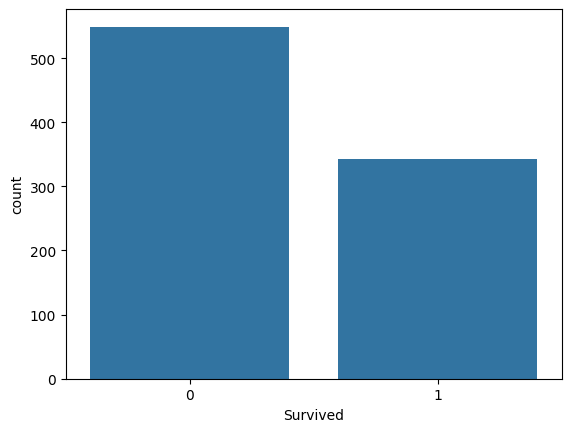

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Survived", data=df)
plt.show()


In [13]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

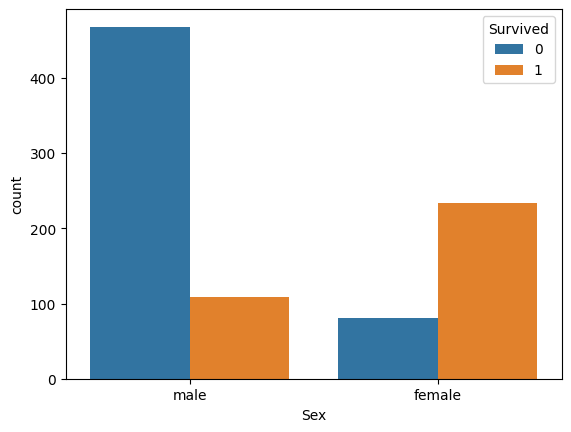

In [14]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

### Insight:
Female passengers had a significantly higher survival rate compared to male passengers.
Most male passengers did not survive.

In [15]:
pd.crosstab(df["Sex"], df["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


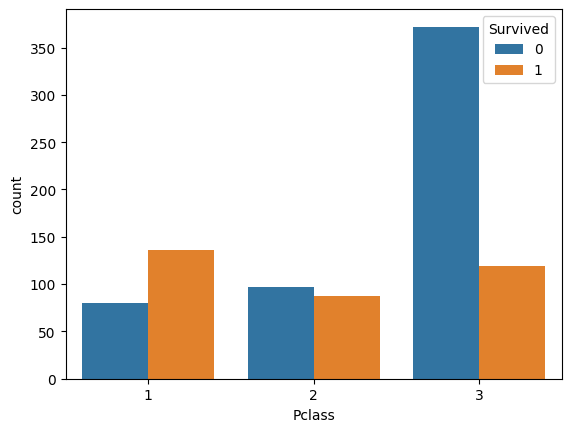

In [16]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()

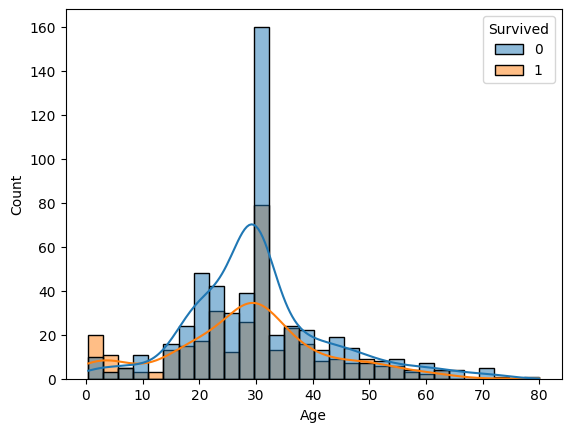

In [17]:
sns.histplot(data=df, x="Age", hue="Survived", kde=True)
plt.show()

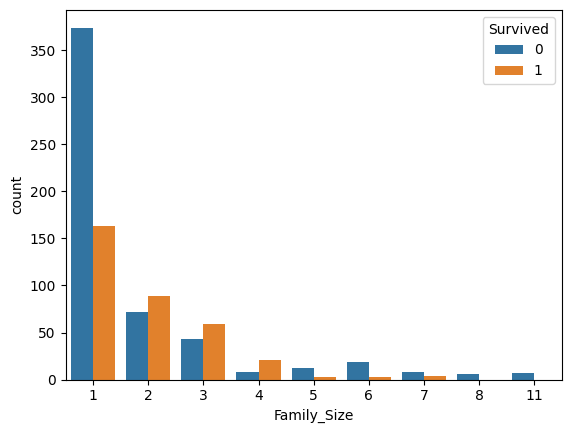

In [18]:
# Create Family Size column
df["Family_Size"] = df["SibSp"] + df["Parch"] + 1

# Visualize survival vs family size
sns.countplot(x="Family_Size", hue="Survived", data=df)
plt.show()


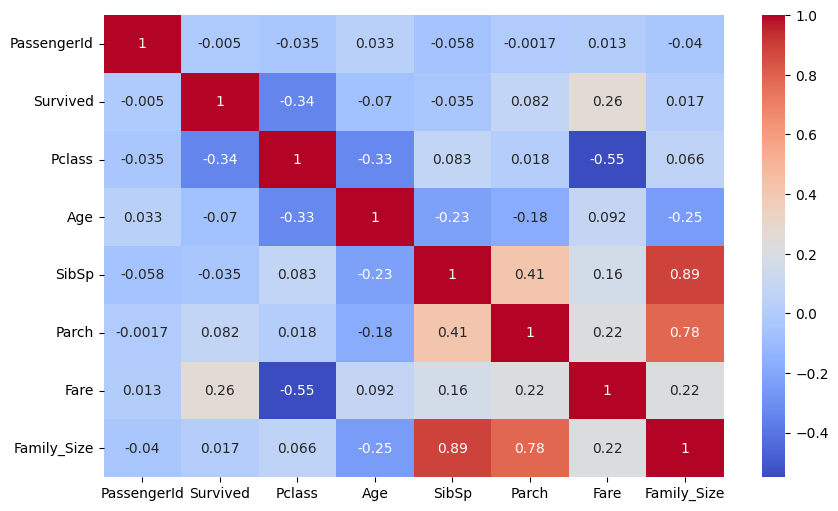

In [19]:
plt.figure(figsize=(10,6))
numeric_cols = df.select_dtypes(include="number")  # selects numeric columns only
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.show()


# Titanic Dataset EDA – Final Insights

1. **Survival Rate**
   - Out of 891 passengers, 342 survived (~38%) and 549 died (~62%).
   
2. **Gender Analysis**
   - Female passengers had a significantly higher survival rate than males.
   - Most males did not survive.

3. **Passenger Class**
   - 1st class passengers had the highest survival rate.
   - 3rd class passengers had the lowest survival rate.

4. **Age Analysis**
   - Children (0–15 years) survived more than adults and elderly passengers.
   - Middle-aged males had the highest death rate.

5. **Family Size**
   - Passengers with **Family Size = 1** (traveling alone) had more survivors.
   - Very large families had lower survival rates.

6. **Correlation Analysis**
   - Pclass and Fare had strong correlation with survival.
   - Age and Family_Size had slight correlations with survival.

7. **Missing Values Handling**
   - Cabin column dropped due to too many missing values.
   - Age missing values filled with mean.
   - Embarked missing values filled with mode.


In [20]:
df.to_csv("titanic_cleaned.csv", index=False)


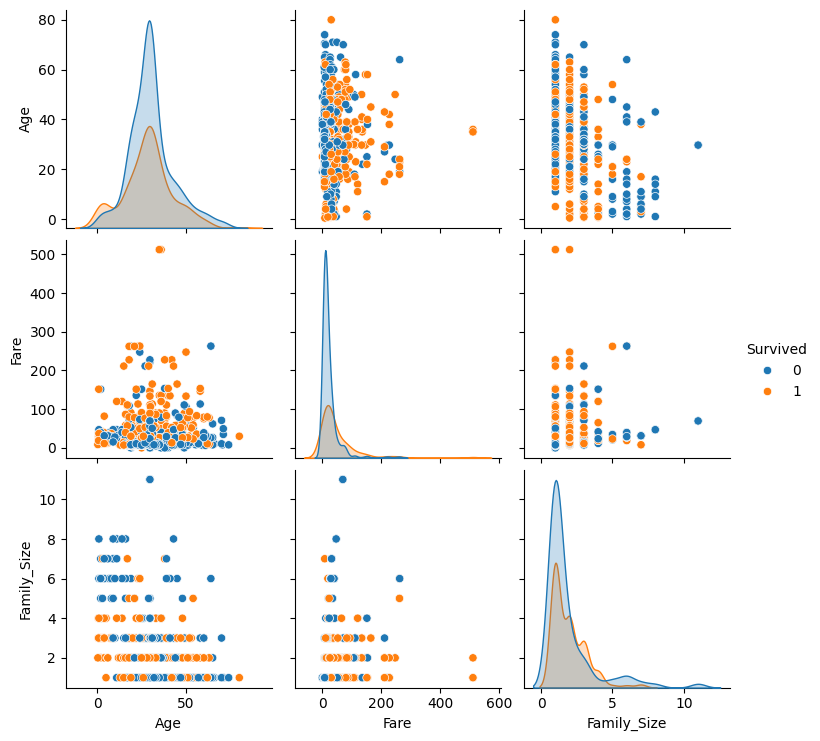

In [21]:
sns.pairplot(df, hue="Survived", vars=["Age", "Fare", "Family_Size"])
plt.show()